In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn (1).csv")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
df.columns = df.columns.str.strip()

In [12]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_28268\617195598.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)


In [13]:
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


# Feature Engineering 

In [ ]:
#monthly charges average
df["AvgCharges"] = df["TotalCharges"] / df["tenure"].replace(0, 1)

In [ ]:
#Is long term customer?
df["is_long_term"] = np.where(df["tenure"] > 12, "Yes", "No")

In [16]:
# Loyalty Class حسب مدة الاشتراك
df["LoyaltyClass"] = pd.cut(
    df["tenure"],
    bins=[0, 12, 36, df["tenure"].max()],
    labels=["New", "Mid", "Loyal"]
)

In [17]:
# Revenue Segment حسب المصروف الشهري
df["RevenueSegment"] = pd.qcut(df["MonthlyCharges"], 3, labels=["Low", "Medium", "High"])

In [18]:
# عدد الخدمات المشترك فيها العميل
services = [
    "PhoneService", "OnlineSecurity", "OnlineBackup",
    "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"
]
df["NumServices"] = df[services].apply(lambda row: sum(row == "Yes"), axis=1)

# Target Engineering

In [19]:
# Target 1: Churn (الأساسي)
df["Churn"] = df["Churn"].map({"Yes": "Yes", "No": "No"})

In [20]:
# Target 2: Time-to-Churn (من tenure)
df["TimeToChurn"] = pd.cut(
    df["tenure"],
    bins=[0, 12, 36, df["tenure"].max()],
    labels=["Short", "Medium", "Long"]
)

In [21]:
# Target 3: Risk Segments (مؤقتًا Placeholder - هيتحدث بعدين بعد الموديل)
np.random.seed(42)
df["RiskSegment"] = np.random.choice(["Low", "Medium", "High"], size=len(df))

In [22]:
# Target 4: Campaign Response (مؤقتًا Placeholder - من Dataset تانية لاحقًا)
df["CampaignResponse"] = np.random.choice(["Yes", "No"], size=len(df))

In [23]:
# Target 5: CLV Segmentation
df["CLV"] = df["tenure"] * df["MonthlyCharges"]
df["CLVSegment"] = pd.qcut(df["CLV"], q=3, labels=["Low", "Medium", "High"])

In [24]:
print("\n After Adding Features and Targets:\n")
display(df[[
    "customerID", "Churn", "tenure", "MonthlyCharges", "TotalCharges",
    "AvgCharges", "is_long_term", "LoyaltyClass", "RevenueSegment",
    "NumServices", "TimeToChurn", "CLV", "CLVSegment", "RiskSegment", "CampaignResponse"
]].head(10))


 After Adding Features and Targets:



,customerID,Churn,tenure,MonthlyCharges,TotalCharges,AvgCharges,is_long_term,LoyaltyClass,RevenueSegment,NumServices,TimeToChurn,CLV,CLVSegment,RiskSegment,CampaignResponse
0,7590-VHVEG,No,1,29.85,29.85,29.850000,No,New,Low,1,Short,29.85,Low,High,No
1,5575-GNVDE,No,34,56.95,1889.50,55.573529,Yes,Mid,Medium,3,Medium,1936.30,Medium,Low,Yes
2,3668-QPYBK,Yes,2,53.85,108.15,54.075000,No,New,Medium,3,Short,107.70,Low,High,Yes
3,7795-CFOCW,No,45,42.30,1840.75,40.905556,Yes,Loyal,Low,3,Long,1903.50,Medium,High,No
4,9237-HQITU,Yes,2,70.70,151.65,75.825000,No,New,Medium,1,Short,141.40,Low,Low,Yes
5,9305-CDSKC,Yes,8,99.65,820.50,102.562500,No,New,High,4,Short,797.20,Medium,Low,No
6,1452-KIOVK,No,22,89.10,1949.40,88.609091,Yes,Mid,High,3,Medium,1960.20,Medium,High,No
7,6713-OKOMC,No,10,29.75,301.90,30.190000,No,New,Low,1,Short,297.50,Low,Medium,Yes
8,7892-POOKP,Yes,28,104.80,3046.05,108.787500,Yes,Mid,High,5,Medium,2934.40,High,High,No
9,6388-TABGU,No,62,56.15,3487.95,56.257258,Yes,Loyal,Medium,3,Long,3481.30,High,High,Yes


# Visualization

C:\Users\Hp\AppData\Local\Temp\ipykernel_28268\903087643.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Churn", data=df, palette="Set2")


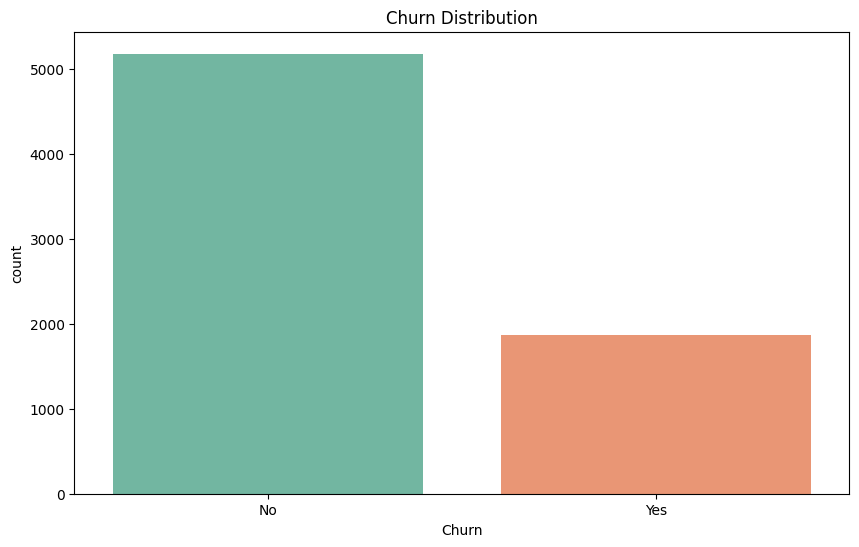

In [33]:
plt.figure(figsize=(10,6))

#1  توزيع العملاء حسب Churn
sns.countplot(x="Churn", data=df, palette="Set2")
plt.title("Churn Distribution")
plt.show()

In [34]:
import plotly.express as px
fig = px.pie(df, names="Churn", title="Churn Distribution")
fig.show()

C:\Users\Hp\AppData\Local\Temp\ipykernel_28268\1958368967.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="TimeToChurn", data=df, palette="crest")


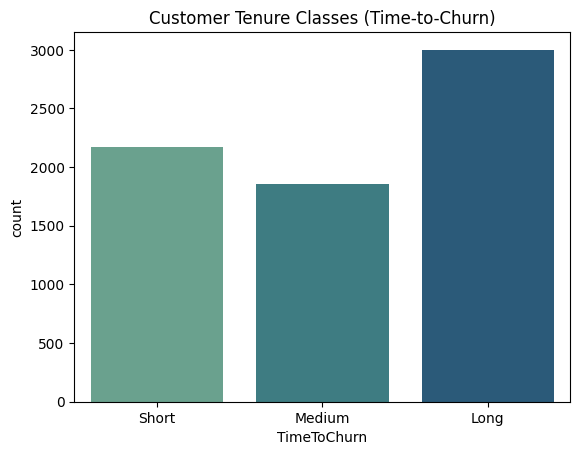

In [ ]:
#2  توزيع العملاء حسب Time-to-Churn
sns.countplot(x="TimeToChurn", data=df, palette="crest")
plt.title("Customer Tenure Classes (Time-to-Churn)")
plt.show()

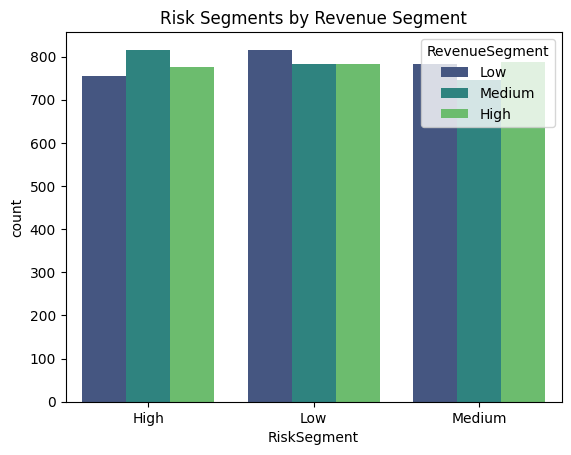

In [28]:

# 3️ Risk Segments حسب Revenue Segment
sns.countplot(x="RiskSegment", hue="RevenueSegment", data=df, palette="viridis")
plt.title("Risk Segments by Revenue Segment")
plt.show()

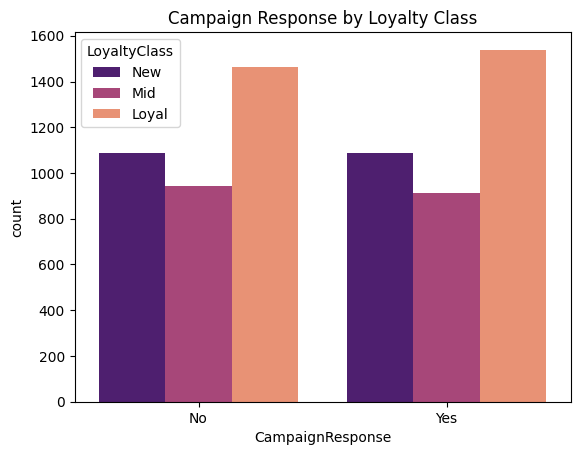

In [29]:
# 4️ Campaign Response حسب Loyalty Class
sns.countplot(x="CampaignResponse", hue="LoyaltyClass", data=df, palette="magma")
plt.title("Campaign Response by Loyalty Class")
plt.show()

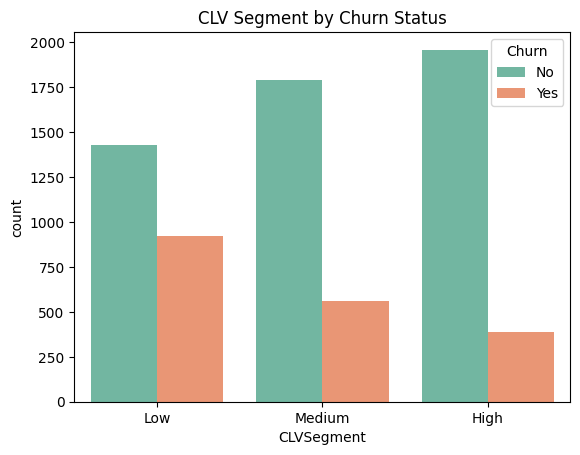

In [30]:
# 5️ CLV Segmentation حسب Churn
sns.countplot(x="CLVSegment", hue="Churn", data=df, palette="Set2")
plt.title("CLV Segment by Churn Status")
plt.show()

C:\Users\Hp\AppData\Local\Temp\ipykernel_28268\4082902604.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="RiskSegment", y="AvgCharges", data=df, palette="cool")


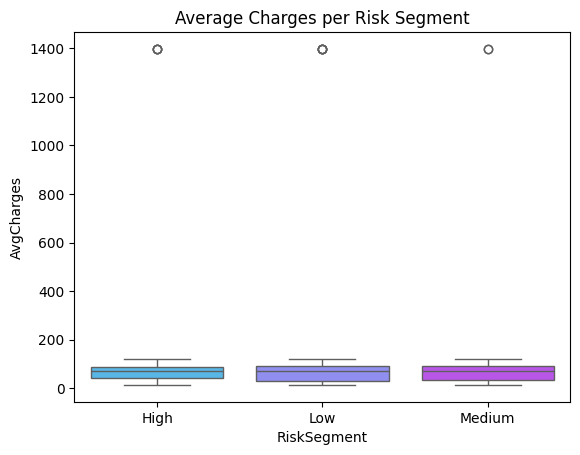

In [31]:
# 6️ Boxplot للعلاقة بين AvgCharges و Risk Segment
sns.boxplot(x="RiskSegment", y="AvgCharges", data=df, palette="cool")
plt.title("Average Charges per Risk Segment")
plt.show()

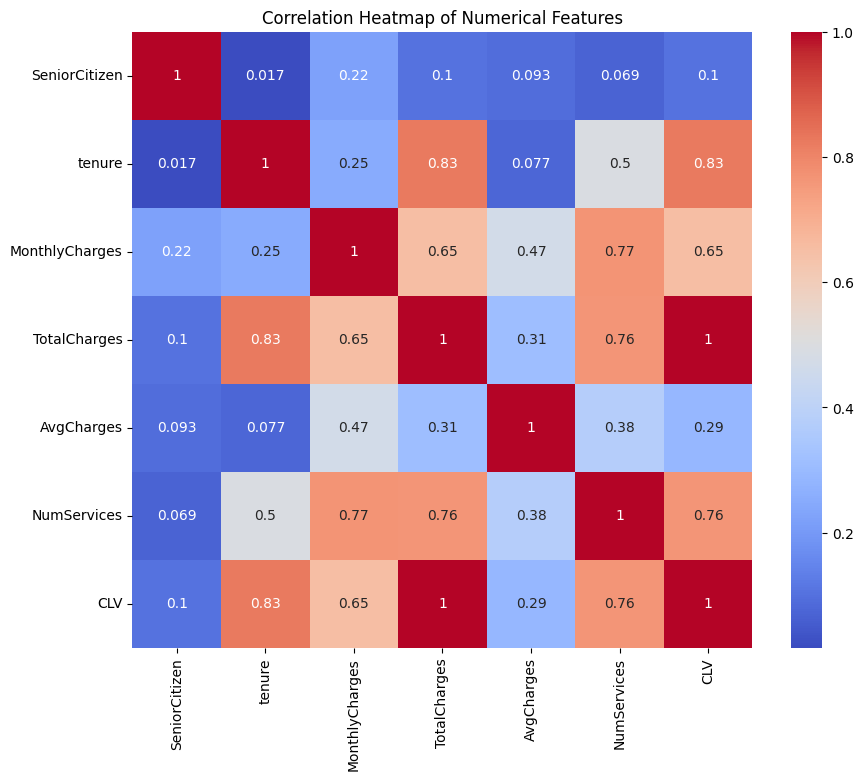

In [32]:
# 7️ Heatmap للعلاقات الرقمية
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

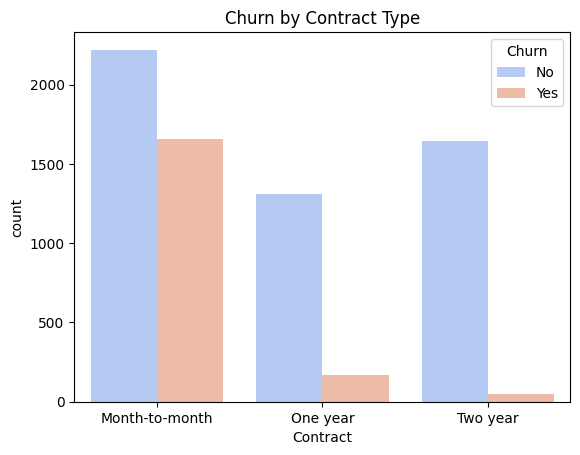

In [ ]:
#8 Contract Type حسب Churn
sns.countplot(x="Contract", hue="Churn", data=df, palette="coolwarm")
plt.title("Churn by Contract Type")
plt.show()


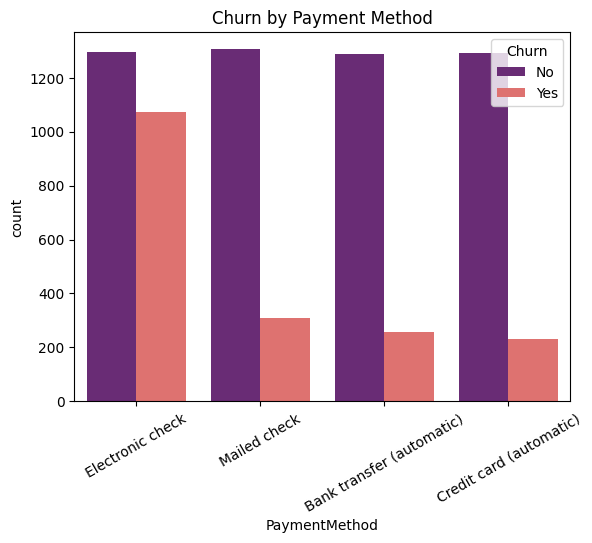

In [ ]:
#9 Payment Method حسب Churn
sns.countplot(x="PaymentMethod", hue="Churn", data=df, palette="magma")
plt.title("Churn by Payment Method")
plt.xticks(rotation=30)
plt.show()


C:\Users\Hp\AppData\Local\Temp\ipykernel_28268\3154676096.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




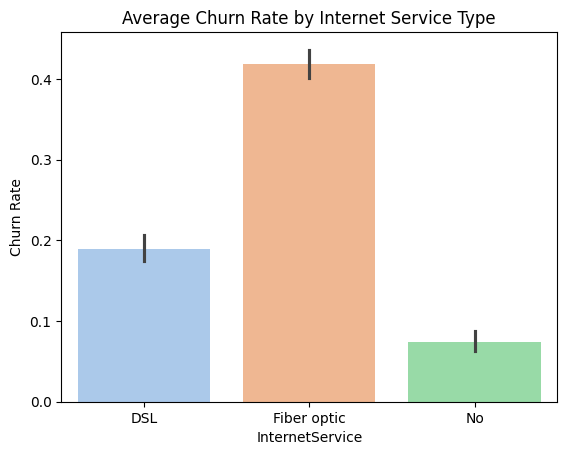

In [ ]:
# 10 Churn Rate حسب Internet Service Type
sns.barplot(x="InternetService", y=df["Churn"].map({"Yes":1,"No":0}), data=df, palette="pastel")
plt.title("Average Churn Rate by Internet Service Type")
plt.ylabel("Churn Rate")
plt.show()


C:\Users\Hp\AppData\Local\Temp\ipykernel_28268\3450231426.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




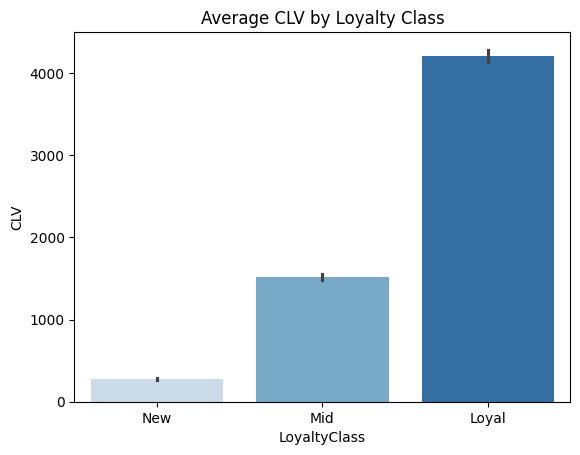

In [ ]:
# 11 Average CLV حسب Loyalty Class
sns.barplot(x="LoyaltyClass", y="CLV", data=df, palette="Blues")
plt.title("Average CLV by Loyalty Class")
plt.show()

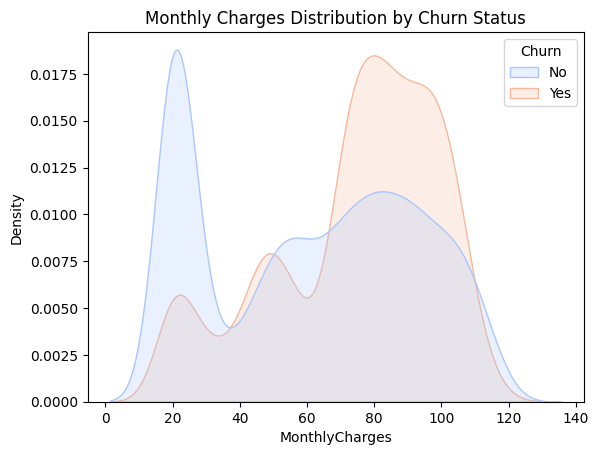

In [ ]:
#12 Distribution of Monthly Charges by Churn Status
sns.kdeplot(data=df, x="MonthlyCharges", hue="Churn", fill=True, common_norm=False, palette="coolwarm")
plt.title("Monthly Charges Distribution by Churn Status")
plt.show()


C:\Users\Hp\AppData\Local\Temp\ipykernel_28268\2283654736.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




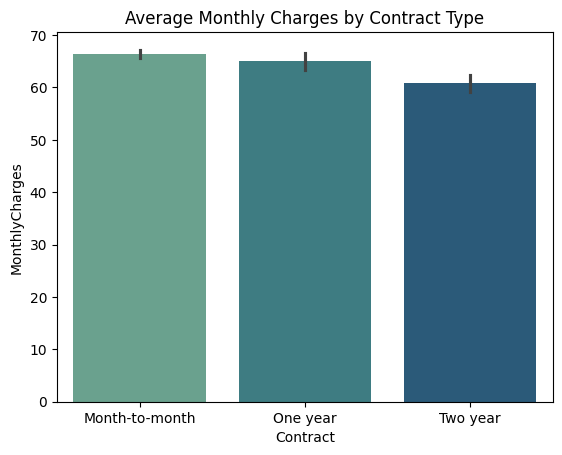

In [ ]:
#13 Average Monthly Charges by Contract Type
sns.barplot(x="Contract", y="MonthlyCharges", data=df, palette="crest")
plt.title("Average Monthly Charges by Contract Type")
plt.show()


C:\Users\Hp\AppData\Local\Temp\ipykernel_28268\3997734124.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




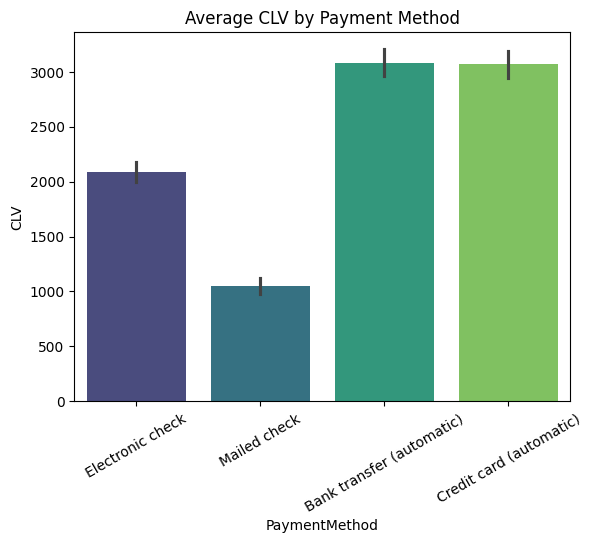

In [ ]:
#14 Average CLV by Payment Method
sns.barplot(x="PaymentMethod", y="CLV", data=df, palette="viridis")
plt.title("Average CLV by Payment Method")
plt.xticks(rotation=30)
plt.show()


In [42]:
df.shape

(7043, 31)

In [43]:
df.to_csv("Telco_Final_Dataset.csv", index=False)